**Følgende kode indhenter data fra Transfermarkt i en dataframe data**

In [1]:
pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.safari.service import Service as SafariService

In [3]:
List_of_national_urls = [
    "https://www.transfermarkt.com/england/kader/verein/3299/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/france/kader/verein/3377/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/brazil/kader/verein/3439/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/portugal/kader/verein/3300/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/spain/kader/verein/3375/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/netherlands/kader/verein/3379/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/argentina/kader/verein/3437/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/germany/kader/verein/3262/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/italy/kader/verein/3376/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/belgium/kader/verein/3382/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/norway/kader/verein/3440/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/uruguay/kader/verein/3449/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/turkiye/kader/verein/3381/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/denmark/kader/verein/3436/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/ukraine/kader/verein/3699/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/nigeria/kader/verein/3444/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/sweden/kader/verein/3557/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/serbia/kader/verein/3438/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/croatia/kader/verein/3556/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/ivory-coast/kader/verein/3591/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/morocco/kader/verein/3575/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/united-states/kader/verein/3505/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/switzerland/kader/verein/3384/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/senegal/kader/verein/3499/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/austria/kader/verein/3383/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/ecuador/kader/verein/5750/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/algeria/kader/verein/3614/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/japan/kader/verein/3435/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/colombia/kader/verein/3816/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/scotland/kader/verein/3380/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/republic-of-ireland/kader/verein/3509/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/mexico/kader/verein/6303/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/poland/kader/verein/3442/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/russia/kader/verein/3448/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/canada/kader/verein/3510/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/wales/kader/verein/3864/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/ghana/kader/verein/3441/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/hungary/kader/verein/3468/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/south-korea/kader/verein/3589/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/mali/kader/verein/3674/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/greece/kader/verein/3378/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/georgia/kader/verein/3669/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/czech-republic/kader/verein/3445/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/slovenia/kader/verein/3588/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/paraguay/kader/verein/3581/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/cameroon/kader/verein/3434/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/chile/kader/verein/3700/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/slovakia/kader/verein/3503/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/albania/kader/verein/3561/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/bosnia-herzegovina/kader/verein/3446/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/democratic-republic-of-the-congo/kader/verein/3854/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/romania/kader/verein/3447/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/kosovo/kader/verein/53982/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/burkina-faso/kader/verein/5872/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/iceland/kader/verein/3574/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/israel/kader/verein/5547/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/north-macedonia/kader/verein/5148/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/iran/kader/verein/3582/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/northern-ireland/kader/verein/5674/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/guinea/kader/verein/3856/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/the-gambia/kader/verein/6186/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/egypt/kader/verein/3672/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/south-africa/kader/verein/3806/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/angola/kader/verein/3585/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/jamaica/kader/verein/3671/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/montenegro/kader/verein/11953/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/venezuela/kader/verein/3504/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/tunisia/kader/verein/3670/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/bulgaria/kader/verein/3394/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/suriname/kader/verein/15359/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/armenia/kader/verein/6219/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/united-arab-emirates/kader/verein/5147/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/togo/kader/verein/3815/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/finland/kader/verein/3443/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/cape-verde/kader/verein/4311/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/australia/kader/verein/3433/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/peru/kader/verein/3584/saison_id/2023/plus/1",
    "https://www.transfermarkt.com/uzbekistan/kader/verein/3563/saison_id/2023/plus/1"
]

data = pd.DataFrame(columns=['Player', 'Team', 'Height', 'International matches', 'Market value'])

# Safari
browser_service = SafariService(executable_path='/System/Cryptexes/App/usr/bin/safaridriver')  # Change path to your Safari driver

for club in List_of_national_urls:
    # Launch browser
    browser = webdriver.Safari(service=browser_service)  # Change to Chrome if using Chrome

    url = f"{club}"    
    browser.get(url)

    # Wait for page to load, you might need to adjust this time based on your internet speed
    browser.implicitly_wait(10)

    # Scrape data
    scraped = pd.read_html(browser.page_source)
    df = scraped[1]
    df = df[['Player', 'Date of birth/Age', 'Height', 'International matches', 'Market value']]
    df = df.dropna()
    two = df.Player.str.split(pat=' ', expand=True)
    two['first'] = two.iloc[:, 0] + ' ' + two.iloc[:, 1]
    df['Player'] = two['first']
    df['Team'] = club.split('/')[-8].replace("-", " ")
    
    data = pd.concat([data, df], axis=0)

    browser.quit()
data.index = range(len(data.index))
data

/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/834994935.py:98: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  scraped = pd.read_html(browser.page_source)
/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/834994935.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, df], axis=0)
/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/834994935.py:98: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  scraped = pd.read_html(browser.pag

,Player,Team,Height,International matches,Market value,Date of birth/Age
0,Aaron Ramsdale,england,"1,90m",5.0,€25.00m,"May 14, 1998 (26)"
1,Jordan Pickford,england,"1,85m",68.0,€22.00m,"Mar 7, 1994 (30)"
2,Dean Henderson,england,"1,88m",1.0,€12.00m,"Mar 12, 1997 (27)"
3,John Stones,england,"1,88m",79.0,€38.00m,"May 28, 1994 (30)"
4,Marc Guéhi,england,"1,82m",16.0,€38.00m,"Jul 13, 2000 (24)"
...,...,...,...,...,...,...
1987,Oston Urunov,uzbekistan,"1,81m",29,€2.50m,"Dec 19, 2000 (23)"
1988,Jaloliddin Masharipov,uzbekistan,"1,72m",65,€1.70m,"Sep 1, 1993 (30)"
1989,Khozhimat Erkinov,uzbekistan,"1,73m",29,€1.00m,"May 29, 2001 (23)"
1990,Eldor Shomurodov,uzbekistan,"1,90m",73,€5.00m,"Jun 29, 1995 (29)"


**Følgende kode udvælger de 18 mest værdifulde spillere fra hvert land i en ny dataframe kaldet data18**

In [4]:
df =data

# Erstat '-' med NaN i 'Market value'
df['Market value'] = df['Market value'].replace('-', np.nan)

# Erstat '-' med NaN i 'Height'
df['Height'] = df['Height'].replace('-', np.nan)

# Fjern rækker, hvor market value eller height er NaN
df = df.dropna(subset=['Market value', 'Height'])

# Fjern meter i højde, hvis kolonnen er en streng
df['Height'] = df['Height'].str.replace('m','').str.replace(',', '.').astype(float)

# Konverter "International matches" til numerisk format og erstat NaN med 0
df['International matches'] = pd.to_numeric(df['International matches'], errors='coerce')
df['International matches'] = df['International matches'].fillna(0)


# Fjern eurotegnet ('€') og 'k', og konverter til float (hvis 'k' findes, divideres værdien med 1000, ellers efterlades den som den er)
def convert_market_value(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('€', '').replace('k', '')) / 1e3
        elif 'm' in value:
            return float(value.replace('€', '').replace('m', ''))
    return float(value)

df['Market value'] = df['Market value'].apply(convert_market_value)

# Konverter til float
df['Market value'] = df['Market value'].astype(float)


# Konverter datokolonne til kun at være alder
df['Date of birth/Age'] = df['Date of birth/Age'].str.extract(r'\((\d+)\)').astype(int)

# Udvælg de 18 spillere fra hvert hold med højeste market value
df18 = df.groupby('Team').apply(lambda x: x.nlargest(18, 'Market value')).reset_index(drop=True)

df18

/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/1300143142.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].str.replace('m','').str.replace(',', '.').astype(float)
/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/1300143142.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['International matches'] = pd.to_numeric(df['International matches'], errors='coerce')
/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/1300143142.py:1

,Player,Team,Height,International matches,Market value,Date of birth/Age
0,Armando Broja,albania,1.91,23.0,22.000,22
1,Kristjan Asllani,albania,1.75,23.0,18.000,22
2,Ernest Muci,albania,1.80,12.0,13.000,23
3,Berat Djimsiti,albania,1.90,60.0,10.000,31
4,Rey Manaj,albania,1.82,36.0,5.000,27
...,...,...,...,...,...,...
1399,Charlie Savage,wales,1.82,2.0,0.600,21
1400,Adam Davies,wales,1.85,5.0,0.500,32
1401,Fin Stevens,wales,1.79,2.0,0.450,21
1402,Josh Sheehan,wales,1.84,7.0,0.400,29


**Følgende kode aggregerer ovenstående på landeniveau**

In [5]:
gns18 = df18.groupby('Team').agg({
    'Height': 'mean',
    'International matches': 'mean',
    'Market value': ['mean', 'var'],
    'Date of birth/Age': 'mean'
})
# Nulstil indekset
gns18.reset_index(inplace=True)

# Tag kun det første niveau af kolonnenavne
gns18.columns = ['Team', 'Height_mean', 'Caps_mean', 'Value_mean', 'Value_var', 'Age_mean']

# Anvend np.log() på relevante kolonner for at oprette nye kolonner med logaritmen af værdierne
gns18['Height_log'] = np.log(gns18['Height_mean'])
gns18['Caps_log'] = np.log(gns18['Caps_mean'])
gns18['Value_log_mean'] = np.log(gns18['Value_mean'])
gns18['Value_log_var'] = np.log(gns18['Value_var'])
gns18['Age_log'] = np.log(gns18['Age_mean'])

## Indlæs Elo-ratings for holdene samt log_Elo
elo = pd.read_csv("/Users/rasmusclausen/Documents/Sportseco/indlaeselo.csv", sep=";", encoding="latin1")

# Fjern duplikater fra elo-dataframen baseret på holdnavn
elo_unique = elo.drop_duplicates(subset=['Team'])

# Erstat komma med punktum i kolonnerne 'EloRanking' og 'LogEloRanking'
elo_unique['EloRanking'] = elo_unique['EloRanking'].str.replace(',', '.').astype(float)
elo_unique['LogEloRanking'] = elo_unique['LogEloRanking'].str.replace(',', '.').astype(float)

# Udfør en inner join på holdnavnene
gns18_with_elo = pd.merge(gns18, elo_unique, on='Team', how='inner')

# Nulstil indekset for den kombinerede dataframe
gns18_with_elo.reset_index(drop=True, inplace=True)
gns18_with_elo

df_nations = gns18_with_elo

# Gem DataFrame'en som en CSV-fil
df_nations.to_csv('df_nations.csv', index=False)

df_nations

,Team,Height_mean,Caps_mean,Value_mean,Value_var,Age_mean,Height_log,Caps_log,Value_log_mean,Value_log_var,Age_log,Region,EloRanking,LogEloRanking
0,albania,1.837222,28.000000,5.961111,34.844869,26.277778,0.608255,3.332205,1.785257,3.550906,3.268724,UEFA,1630.0,3.21
1,algeria,1.803333,31.222222,9.938889,116.058987,26.666667,0.589637,3.441130,2.296455,4.754099,3.283414,CAF,1644.0,3.22
2,argentina,1.789444,43.055556,43.444444,826.496732,26.500000,0.581905,3.762491,3.771483,6.717196,3.277145,CONMEBOL,2168.0,3.34
3,armenia,1.809444,20.055556,1.940278,22.481407,25.055556,0.593020,2.998506,0.662831,3.112689,3.221096,UEFA,1462.0,3.16
4,australia,1.811667,20.388889,1.991667,5.523309,26.055556,0.594247,3.014990,0.688972,1.708977,3.260231,AFC,1774.0,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,united states,1.835000,31.722222,17.944444,78.643791,23.888889,0.607044,3.457017,2.887281,4.364929,3.173413,CONCACAF,1747.0,3.24
71,uruguay,1.791111,33.111111,25.916667,1001.242647,25.388889,0.582836,3.499869,3.254886,6.908997,3.234312,CONMEBOL,1987.0,3.30
72,uzbekistan,1.800556,31.222222,1.713889,2.274649,25.777778,0.588095,3.441130,0.538765,0.821826,3.249513,AFC,1680.0,3.23
73,venezuela,1.785556,26.166667,3.961111,30.437810,26.722222,0.579730,3.264486,1.376525,3.415686,3.285496,CONMEBOL,1820.0,3.26


**Følgende kode henter datasættet produceret herover for at beregne dekomponering**

In [6]:
#Indlæser
dekomp = pd.read_csv("df_nations.csv", sep=",", encoding="latin1")

#Beregner dekomponering. Opdaterede dekomponeringsværdier per 7/8-2024
dekomp['DV'] = dekomp.Value_log_mean * 171.09
dekomp['DC'] = dekomp.Caps_log * 142.66
dekomp['DS'] = dekomp.Value_log_var * -36.24
dekomp['Intercept'] = 1050.41
dekomp['Expected'] = dekomp.DV + dekomp.DC + dekomp.DS + dekomp.Intercept
dekomp['resid'] = dekomp.EloRanking - dekomp.Expected

dekomp.to_excel('dekomp.xlsx', index=False)

dekomp

,Team,Height_mean,Caps_mean,Value_mean,Value_var,Age_mean,Height_log,Caps_log,Value_log_mean,Value_log_var,Age_log,Region,EloRanking,LogEloRanking,DV,DC,DS,Intercept,Expected,resid
0,albania,1.837222,28.000000,5.961111,34.844869,26.277778,0.608255,3.332205,1.785257,3.550906,3.268724,UEFA,1630.0,3.21,305.439602,475.372295,-128.684830,1050.41,1702.537067,-72.537067
1,algeria,1.803333,31.222222,9.938889,116.058987,26.666667,0.589637,3.441130,2.296455,4.754099,3.283414,CAF,1644.0,3.22,392.900526,490.911619,-172.288532,1050.41,1761.933613,-117.933613
2,argentina,1.789444,43.055556,43.444444,826.496732,26.500000,0.581905,3.762491,3.771483,6.717196,3.277145,CONMEBOL,2168.0,3.34,645.263024,536.757005,-243.431182,1050.41,1988.998847,179.001153
3,armenia,1.809444,20.055556,1.940278,22.481407,25.055556,0.593020,2.998506,0.662831,3.112689,3.221096,UEFA,1462.0,3.16,113.403781,427.766895,-112.803836,1050.41,1478.776840,-16.776840
4,australia,1.811667,20.388889,1.991667,5.523309,26.055556,0.594247,3.014990,0.688972,1.708977,3.260231,AFC,1774.0,3.25,117.876187,430.118486,-61.933330,1050.41,1536.471343,237.528657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,united states,1.835000,31.722222,17.944444,78.643791,23.888889,0.607044,3.457017,2.887281,4.364929,3.173413,CONCACAF,1747.0,3.24,493.984832,493.178110,-158.185015,1050.41,1879.387926,-132.387926
71,uruguay,1.791111,33.111111,25.916667,1001.242647,25.388889,0.582836,3.499869,3.254886,6.908997,3.234312,CONMEBOL,1987.0,3.30,556.878491,499.291299,-250.382057,1050.41,1856.197732,130.802268
72,uzbekistan,1.800556,31.222222,1.713889,2.274649,25.777778,0.588095,3.441130,0.538765,0.821826,3.249513,AFC,1680.0,3.23,92.177303,490.911619,-29.782960,1050.41,1603.715961,76.284039
73,venezuela,1.785556,26.166667,3.961111,30.437810,26.722222,0.579730,3.264486,1.376525,3.415686,3.285496,CONMEBOL,1820.0,3.26,235.509589,465.711621,-123.784446,1050.41,1627.846763,192.153237


**Her laves dekomponeringsplottet for udvalgte lande**

/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/3087949427.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dekomp['Elo_minus_Intercept'] = filtered_dekomp['EloRanking'] - filtered_dekomp['Intercept']


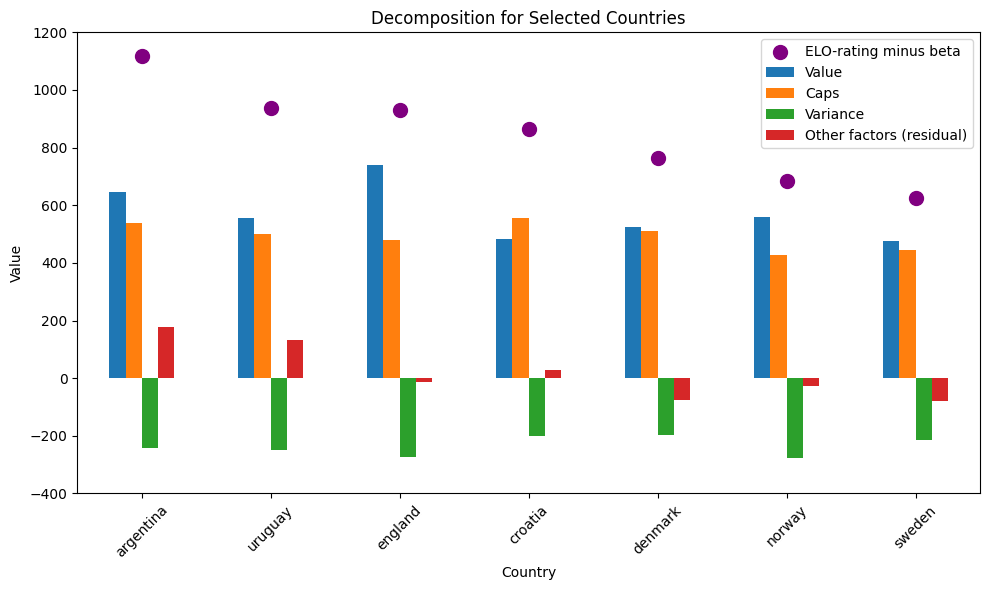

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs data
dekomp = pd.read_excel("dekomp.xlsx")

# Filtrer for de ønskede lande
selected_countries = ['argentina', 'england', 'uruguay','croatia','denmark', 'norway','sweden']
filtered_dekomp = dekomp[dekomp['Team'].isin(selected_countries)]

# Beregn forskellen mellem EloRating og Intercept
filtered_dekomp['Elo_minus_Intercept'] = filtered_dekomp['EloRanking'] - filtered_dekomp['Intercept']

# Sorter landene efter Elo_minus_Intercept
filtered_dekomp = filtered_dekomp.sort_values(by='Elo_minus_Intercept',ascending=False)

# Lav søjlediagram
fig, ax = plt.subplots(figsize=(10, 6))

# Lav grupperet søjlediagram for DV, DC, og DS
filtered_dekomp.plot(kind='bar', x='Team', y=['DV', 'DC', 'DS', 'resid'], label=['Value', 'Caps', 'Variance', 'Other factors (residual)'], ax=ax)

# Tilføj prikker for EloRanking minus Intercept
ax.scatter(filtered_dekomp['Team'], filtered_dekomp['Elo_minus_Intercept'], color='purple', marker='o', s=100, label='ELO-rating minus beta')

# Justeringer og labels
plt.title('Decomposition for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Juster y-aksen
plt.ylim(-400, 1200)

plt.tight_layout()
plt.show()



**Her laves plot for de mest underperformende landshold**

/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/1875957746.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dekomp['Elo_minus_Intercept'] = filtered_dekomp['EloRanking'] - filtered_dekomp['Intercept']


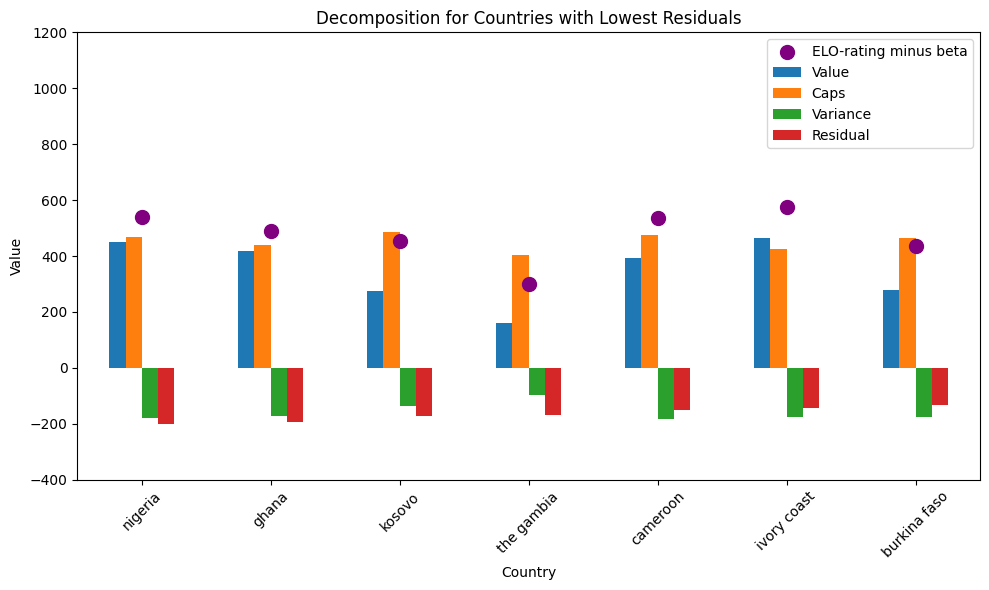

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs data
dekomp = pd.read_excel("dekomp.xlsx")

# Vælg de 7 lande med laveste resid
selected_countries = dekomp.nsmallest(7, 'resid')['Team']

# Filtrer de ønskede lande
filtered_dekomp = dekomp[dekomp['Team'].isin(selected_countries)]

# Beregn forskellen mellem EloRating og Intercept
filtered_dekomp['Elo_minus_Intercept'] = filtered_dekomp['EloRanking'] - filtered_dekomp['Intercept']

# Sorter landene efter Elo_minus_Intercept
filtered_dekomp = filtered_dekomp.sort_values(by='resid',ascending=True)

# Lav søjlediagram
fig, ax = plt.subplots(figsize=(10, 6))

# Lav grupperet søjlediagram for DV, DC, og DS
filtered_dekomp.plot(kind='bar', x='Team', y=['DV', 'DC', 'DS', 'resid'], label=['Value', 'Caps', 'Variance', 'Residual'], ax=ax)

# Tilføj prikker for EloRanking minus Intercept
ax.scatter(filtered_dekomp['Team'], filtered_dekomp['Elo_minus_Intercept'], color='purple', marker='o', s=100, label='ELO-rating minus beta')

# Justeringer og labels
plt.title('Decomposition for Countries with Lowest Residuals')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Juster y-aksen
plt.ylim(-400, 1200)

plt.tight_layout()
plt.show()


**Mest overperformende**

/var/folders/hf/qpybv3sn5lb7st1f2w0000w80000gn/T/ipykernel_27014/2138305148.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dekomp['Elo_minus_Intercept'] = filtered_dekomp['EloRanking'] - filtered_dekomp['Intercept']


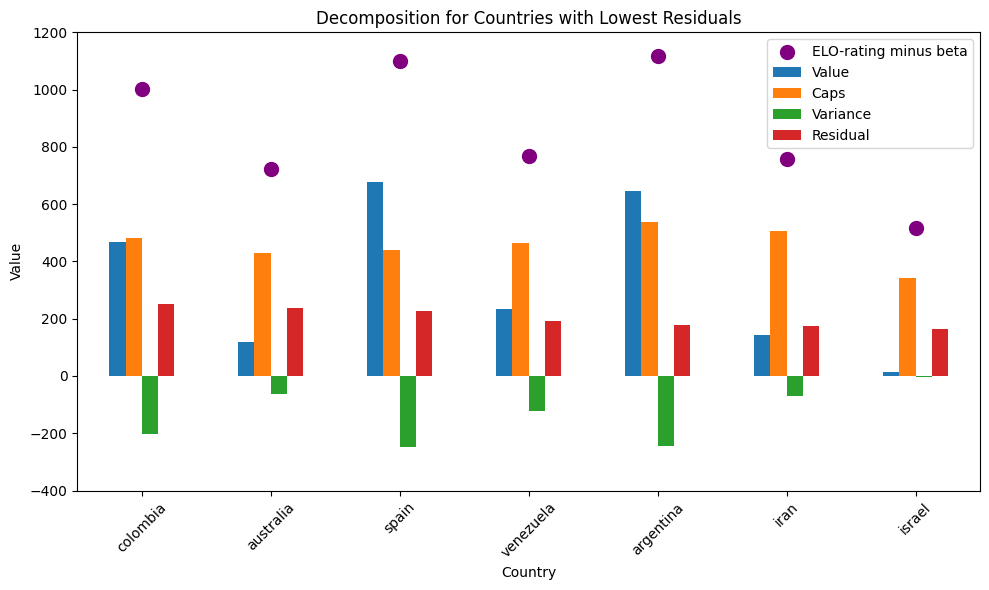

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs data
dekomp = pd.read_excel("dekomp.xlsx")

# Vælg de 7 lande med laveste resid
selected_countries = dekomp.nlargest(7, 'resid')['Team']

# Filtrer de ønskede lande
filtered_dekomp = dekomp[dekomp['Team'].isin(selected_countries)]

# Beregn forskellen mellem EloRating og Intercept
filtered_dekomp['Elo_minus_Intercept'] = filtered_dekomp['EloRanking'] - filtered_dekomp['Intercept']

# Sorter landene efter Elo_minus_Intercept
filtered_dekomp = filtered_dekomp.sort_values(by='resid',ascending=False)

# Lav søjlediagram
fig, ax = plt.subplots(figsize=(10, 6))

# Lav grupperet søjlediagram for DV, DC, og DS
filtered_dekomp.plot(kind='bar', x='Team', y=['DV', 'DC', 'DS', 'resid'], label=['Value', 'Caps', 'Variance', 'Residual'], ax=ax)

# Tilføj prikker for EloRanking minus Intercept
ax.scatter(filtered_dekomp['Team'], filtered_dekomp['Elo_minus_Intercept'], color='purple', marker='o', s=100, label='ELO-rating minus beta')

# Justeringer og labels
plt.title('Decomposition for Countries with Lowest Residuals')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Juster y-aksen
plt.ylim(-400, 1200)

plt.tight_layout()
plt.show()
